# CA03 – Decision Tree Algorithm

# Eric Wu

## Import Basic Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# InteractiveShell would allow me to show every result in one cell
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns
plt.style.use('ggplot')

## Data Quality Analysis

• Perform a Data Quality Analysis to find missing values, outliers, NaNs etc.  
• Display descriptive statistics of each column  
• Perform necessary data cleansing and transformation based on your
observations from the data quality analysis

In [2]:
census = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')
census.head()

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0

In [3]:
# change the interactiveshell to display all code in a cell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
census.info()
# the target variable y should be describe as categorical variable instead of numerical variable
census[['y']].astype('str').describe()
census.describe(exclude='int')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
hours_per_week_bin    48842 non-null object
occupation_bin        48842 non-null object
msr_bin               48842 non-null object
capital_gl_bin        48842 non-null object
race_sex_bin          48842 non-null object
education_num_bin     48842 non-null object
education_bin         48842 non-null object
workclass_bin         48842 non-null object
age_bin               48842 non-null object
flag                  48842 non-null object
y                     48842 non-null int64
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


y
count   48842
unique      2
top         0
freq    37155

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
count               48842          48842    48842          48842        48842   
unique                  5              5        3              3            3   
top              b. 31-40   c. Mid - Mid  c. High         a. = 0      c. High   
freq                26639          13971    22047          42525        29737   
mean                  NaN            NaN      NaN            NaN          NaN   
std                   NaN            NaN      NaN            NaN          NaN   
min                   NaN            NaN      NaN            NaN          NaN   
25%                   NaN            NaN      NaN            NaN          NaN   
50%                   NaN            NaN      NaN            NaN          NaN   
75%                   NaN            NaN      NaN            NaN          NaN   
max                   NaN            NaN      NaN            NaN          NaN   

       education_num_bin education_bin workclass_bin   age_bin   flag  \
count              48842         48842         48842     48842  48842   
unique                 5             5             2         5      2   
top              b. 9-12        b. Mid     b. income  e. 40-55  train   
freq               30324         30324         46012     13963  32561   
mean                 NaN           NaN           NaN       NaN    NaN   
std                  NaN           NaN           NaN       NaN    NaN   
min                  NaN           NaN           NaN       NaN    NaN   
25%                  NaN           NaN           NaN       NaN    NaN   
50%                  NaN           NaN           NaN       NaN    NaN   
75%                  NaN           NaN           NaN       NaN    NaN   
max                  NaN           NaN           NaN       NaN    NaN   

                   y  
count   48842.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.239282  
std         0.426649  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

## Exploratory Data Analysis

Perform EDA of the income group with respect to the seven explanatory variables and display graphical representations as shown below. Do all of these inside your Notebook.

In [5]:
# change the interactiveshell back to display the last code
InteractiveShell.ast_node_interactivity = "last"

In [6]:
# This function could calculate the y[0,1] percentage for each bin in each column. See the table below
def stackbar(column):
  group = pd.pivot_table(census,values='flag',columns='y',index=column, aggfunc='count',margins=True)
  group['percent_0'] = group.iloc[:-1,0]/group.iloc[:-1,2]
  group['percent_1'] = group.iloc[:-1,1]/group.iloc[:-1,2]
  return group.iloc[:-1,-2:]

In [7]:
stackbar('age_bin')

y                  percent_0  percent_1
age_bin                                
a. 0-25             0.982445   0.017555
b. 26-30 & 71-100   0.861388   0.138612
c. 31-35 & 61-70    0.757292   0.242708
d. 36-40 & 56-60    0.668982   0.331018
e. 40-55            0.618062   0.381938

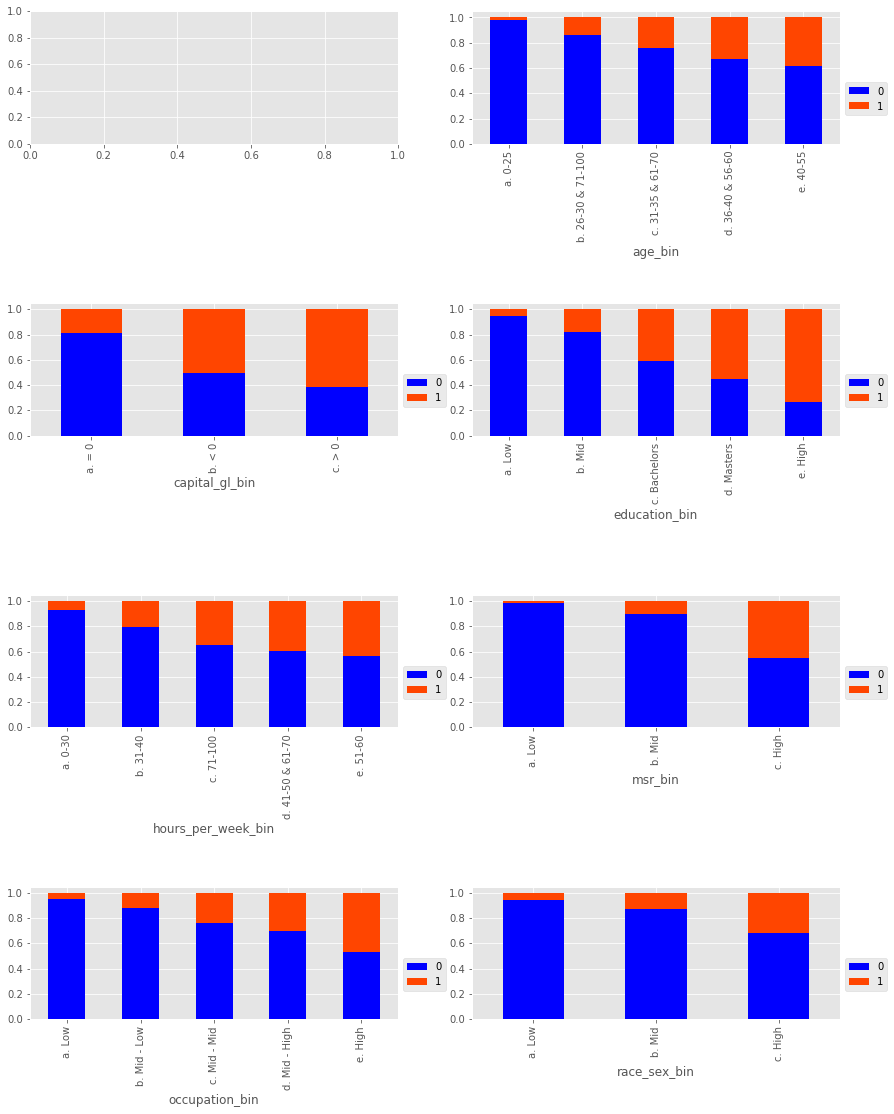

In [8]:
# create a subplot figure that contains 4 rows and 2 columns
fig, axes = plt.subplots(nrows=4, ncols=2)
#      plot the bar | the position in subplot | stack bar | colors |               legend for 0,1 |    put the legend outside the plot 
stackbar('age_bin').plot.bar(ax=axes[0,1],stacked=True,color=('blue','orangered')).legend(labels=(0,1),bbox_to_anchor=(1, 0.5))
stackbar('capital_gl_bin').plot.bar(ax=axes[1,0],stacked=True,color=('blue','orangered')).legend(labels=(0,1),bbox_to_anchor=(1, 0.5))
stackbar('education_bin').plot.bar(ax=axes[1,1],stacked=True,color=('blue','orangered')).legend(labels=(0,1),bbox_to_anchor=(1, 0.5))
stackbar('hours_per_week_bin').plot.bar(ax=axes[2,0],stacked=True,color=('blue','orangered')).legend(labels=(0,1),bbox_to_anchor=(1, 0.5))
stackbar('msr_bin').plot.bar(ax=axes[2,1],stacked=True,color=('blue','orangered')).legend(labels=(0,1),bbox_to_anchor=(1, 0.5))
stackbar('occupation_bin').plot.bar(ax=axes[3,0],stacked=True,color=('blue','orangered')).legend(labels=(0,1),bbox_to_anchor=(1, 0.5))
stackbar('race_sex_bin').plot.bar(ax=axes[3,1],stacked=True,color=('blue','orangered')).legend(labels=(0,1),bbox_to_anchor=(1, 0.5))

# adjust the subplot size
plt.subplots_adjust(bottom=0.5, right=2, top=4,hspace=1.2)

## Build Decision Tree Classifier Models

Definition: Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.

Advantages: Decision Tree is simple to understand and visualise, requires little data preparation, and can handle both numerical and categorical data.

Disadvantages: Decision tree can create complex trees that do not generalize well, and decision trees can be unstable because small variations in the data might result in a completely different tree being generated.

In [9]:
# This loop is to check if education_num_bin and education_bin are all in the same category (a,b,c,d,e)
for i in range(len(census)):
  if census['education_num_bin'][i][:1]!=census['education_bin'][i][:1]:
    print(census)   

# If you run this loop and nothing shows up means that they are all the same
# Therefore, I would drop one of these to make the result more accurate. 

In [10]:
census.drop('education_num_bin',axis=1,inplace=True)

In [11]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import OneHotEncoder

In [12]:
# split the data to train and test
X_train = census.loc[census['flag']=='train',:'age_bin']
y_train = census.loc[census['flag']=='train','y']
# I reset the index so the index of test data could start from 0 instead of 32561 
X_test = census.loc[census['flag']=='test',:'age_bin'].reset_index(drop=True)
y_test = census.loc[census['flag']=='test','y'].reset_index(drop=True)

In [13]:
# One Hot encoding
# The reason why I choose OneHotEncoder over getting dummies is because for machine learning, 
# you almost definitely want to use sklearn.OneHotEncoder. For other tasks like simple analysis, 
# you might be able to use pd.get_dummies, which is a bit more convenient. 
# Reference: "https://stackoverflow.com/questions/36631163/pandas-get-dummies-vs-sklearns-onehotencoder-what-are-the-pros-and-cons"
onehotencoder = OneHotEncoder(handle_unknown='ignore')  
X_train = onehotencoder.fit_transform(X_train).toarray() 
X_test = onehotencoder.transform(X_test).toarray()

In [14]:
# The first tree
tree_gini = DecisionTreeClassifier(max_depth=10,random_state=101,min_samples_leaf=15,min_samples_split=2)
tree_gini.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [15]:
y_pred_gini = tree_gini.predict(X_test)

## Visualize Your Decision Tree using GraphViz

In [16]:
# If you're running with Jupyter Notebook, you might not have these two packages. Uncomment them and run this cell

# !pip install pydotplus

# import os
# os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

C:\Users\wuuj0\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.9764 to fit



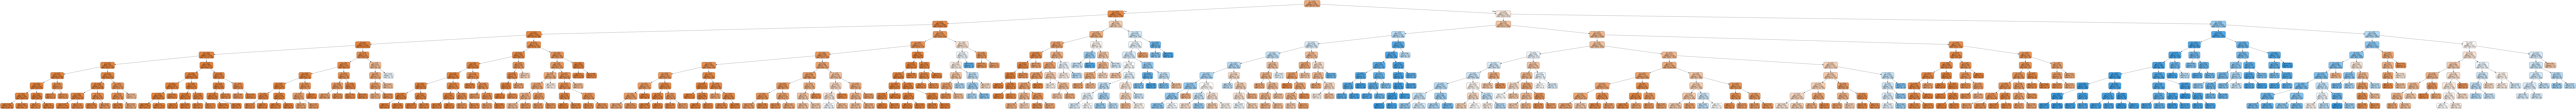

In [17]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('first_tree.png')
Image(graph.create_png())

## Evaluate Decision Tree Performance

Confusion Matrix (TP, TN, FP, FN … etc.)

Accuracy, Precision, Recall, F1 Score, AUC Value, ROC Curve (graph)

In [18]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score,accuracy_score, f1_score, roc_curve, roc_auc_score, classification_report

The Confusion Matrix in Sklearn looks like

[ TN FP ]

[ FN TP ]

In [19]:
# Confusion Matrix
confma = confusion_matrix(y_test, y_pred_gini)
print(("Confusion Matrix:\n{}").format(confma))

Confusion Matrix:
[[11538   897]
 [ 1656  2190]]


• True Positive (TP) : Observation is positive, and is predicted to be positive.

• False Negative (FN) : Observation is positive, but is predicted negative.

• True Negative (TN) : Observation is negative, and is predicted to be negative.

• False Positive (FP) : Observation is negative, but is predicted positive.

In [20]:
# TN, FP, FN, TP
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_gini).ravel()
print(('TN:{}\nFP:{}\nFN:{}\nTP:{}\n').format(tn, fp, fn, tp))

TN:11538
FP:897
FN:1656
TP:2190



In [21]:
# Accuracy
accuracy = accuracy_score(y_test,y_pred_gini)
print("Accuracy:\n{}".format(accuracy))

Accuracy:
0.8431914501566243


Recall gives us an idea about when it’s actually yes, how often does it predict yes.

In [22]:
# Recall
recall = recall_score(y_test,y_pred_gini)
print(("Recall Score:\n{}").format(recall))

Recall Score:
0.5694227769110765


Precision tells us about when it predicts yes, how often is it correct.

In [23]:
# Precision
precision = precision_score(y_test,y_pred_gini)
print(("Precision Score:\n{}").format(precision))

Precision Score:
0.7094266277939747


The f1 score is the harmonic mean of recall and precision, with a higher score as a better model.

In [24]:
# F1 score
f1 = f1_score(y_test,y_pred_gini)
print(("f1_score:\n{}").format(f1))

f1_score:
0.6317611423626136


In [25]:
# In summary, we could use classification report instead of coding one by one
# Our target is y=1, so we only need to look at the row that is 1
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.84      0.84      0.84     16281



ROC curves are VERY helpful with understanding the balance between true-positive rate and false-positive rates.

In [26]:
# For the binary classification, we need to put the probabilty of how close it is to 0 and 1, 
# instead of putting the prediction (0,1) in ROC
y_score_gini = tree_gini.predict_proba(X_test)[:,1]
fpr_gini, tpr_gini, thresholds_gini = roc_curve(y_test,y_score_gini)

Text(0, 0.5, 'True Positive Rate')

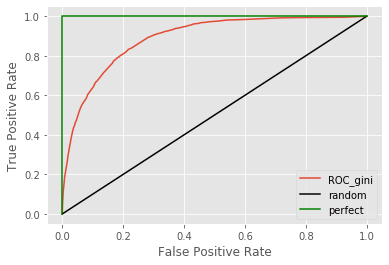

In [27]:
plt.plot(fpr_gini, tpr_gini,label = 'ROC_gini')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [28]:
# The Area Under the Curve
auc_gini = roc_auc_score(y_test,y_pred_gini)
print(("auc:\n{}").format(auc_gini))

auc:
0.748643837188952


## Tune Decision Tree Performance

### First Tuning

In [29]:
# The tree that use exactly the same parameters excluding the criterion
tree_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=101,min_samples_leaf=15,min_samples_split=2)

tree_entropy.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [30]:
y_pred_entropy = tree_entropy.predict(X_test)

In [31]:
# Confusion Matrix
confma = confusion_matrix(y_test, y_pred_entropy)
print(("Confusion Matrix:\n{}").format(confma))

Confusion Matrix:
[[11545   890]
 [ 1653  2193]]


In [32]:
print(classification_report(y_test,y_pred_entropy))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.84      0.84      0.84     16281



In [33]:
# ROC
y_score_entropy = tree_entropy.predict_proba(X_test)[:,1]
fpr_entropy, tpr_entropy, thresholds_entropy = roc_curve(y_test,y_score_entropy)

Text(0, 0.5, 'True Positive Rate')

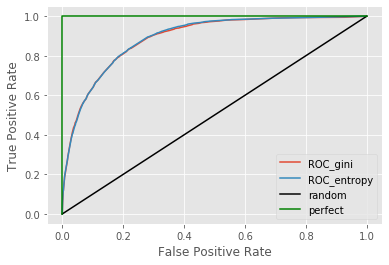

In [34]:
# plot two roc with the same parameters but differenct criterion
plt.plot(fpr_gini, tpr_gini,label = 'ROC_gini')
plt.plot(fpr_entropy, tpr_entropy,label = 'ROC_entropy')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [35]:
# The Area Under the Curve
auc_entropy = roc_auc_score(y_test,y_pred_entropy)
print(("auc:\n{}").format(auc_entropy))

auc:
0.749315316400352


### Second Tuning

In [36]:
tree_2_gini = DecisionTreeClassifier(criterion='gini',max_depth=7,
                              random_state=101,min_samples_leaf=10,min_samples_split=4)
tree_2_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=7,
                              random_state=101,min_samples_leaf=10,min_samples_split=4)

In [37]:
tree_2_gini.fit(X_train,y_train)
tree_2_entropy.fit(X_train,y_train)
y_pred_2_gini = tree_2_gini.predict(X_test)
y_pred_2_entropy = tree_2_entropy.predict(X_test)

In [38]:
# Confusion Matrix
confma_g = confusion_matrix(y_test, y_pred_2_gini)
confma_e = confusion_matrix(y_test, y_pred_2_entropy)
print(("Confusion Matrix for tree 2 by gini:\n{}").format(confma_g))
print(("Confusion Matrix for tree 2 by entropy:\n{}").format(confma_e))

Confusion Matrix for tree 2 by gini:
[[11457   978]
 [ 1586  2260]]
Confusion Matrix for tree 2 by entropy:
[[11506   929]
 [ 1646  2200]]


In [39]:
print(("Classification report for tree 2 by gini:\n{}").format(classification_report(y_test,y_pred_2_gini)))
print(("Classification report for tree 2 by entropy:\n{}").format(classification_report(y_test,y_pred_2_entropy)))

Classification report for tree 2 by gini:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     12435
           1       0.70      0.59      0.64      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.84      0.84      0.84     16281

Classification report for tree 2 by entropy:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.70      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.83      0.84      0.84     16281



In [40]:
# ROC
y_score_2_gini = tree_2_gini.predict_proba(X_test)[:,1]
fpr_2_gini, tpr_2_gini, thresholds_2_gini = roc_curve(y_test,y_score_2_gini)

y_score_2_entropy = tree_2_entropy.predict_proba(X_test)[:,1]
fpr_2_entropy, tpr_2_entropy, thresholds_2_entropy = roc_curve(y_test,y_score_2_entropy)

Text(0, 0.5, 'True Positive Rate')

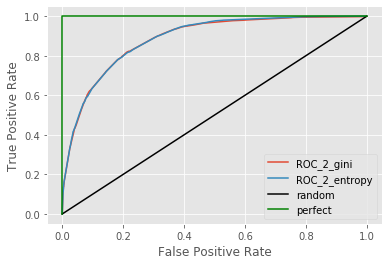

In [41]:
plt.plot(fpr_2_gini, tpr_2_gini,label = 'ROC_2_gini')
plt.plot(fpr_2_entropy, tpr_2_entropy,label = 'ROC_2_entropy')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [42]:
# The Area Under the Curve
auc_2_gini = roc_auc_score(y_test,y_pred_2_gini)
auc_2_entropy = roc_auc_score(y_test,y_pred_2_entropy)
print(("auc for tree2 by using gini:\n{}").format(auc_2_gini))
print(("auc for tree2 by using entropy:\n{}").format(auc_2_entropy))

auc for tree2 by using gini:
0.7544872651359613
auc for tree2 by using entropy:
0.748657198398913


### Thrid Tuning

In [43]:
tree_3_gini = DecisionTreeClassifier(criterion='gini',max_depth=15,
                              random_state=101,min_samples_leaf=12,min_samples_split=5)
tree_3_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=15,
                              random_state=101,min_samples_leaf=12,min_samples_split=5)


In [44]:
tree_3_gini.fit(X_train,y_train)
tree_3_entropy.fit(X_train,y_train)
y_pred_3_gini = tree_3_gini.predict(X_test)
y_pred_3_entropy = tree_3_entropy.predict(X_test)

In [45]:
# Confusion Matrix
confma_g = confusion_matrix(y_test, y_pred_3_gini)
confma_e = confusion_matrix(y_test, y_pred_3_entropy)
print(("Confusion Matrix for tree 3 by gini:\n{}").format(confma_g))
print(("Confusion Matrix for tree 3 by entropy:\n{}").format(confma_e))

Confusion Matrix for tree 3 by gini:
[[11537   898]
 [ 1686  2160]]
Confusion Matrix for tree 3 by entropy:
[[11540   895]
 [ 1669  2177]]


In [46]:
# Classification report
print(("Classification report for tree 3 by gini:\n{}").format(classification_report(y_test,y_pred_3_gini)))
print(("Classification report for tree 3 by entropy:\n{}").format(classification_report(y_test,y_pred_3_entropy)))

Classification report for tree 3 by gini:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.56      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281

Classification report for tree 3 by entropy:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.76     16281
weighted avg       0.83      0.84      0.84     16281



In [47]:
# ROC
y_score_3_gini = tree_3_gini.predict_proba(X_test)[:,1]
fpr_3_gini, tpr_3_gini, thresholds_3_gini = roc_curve(y_test,y_score_3_gini)

y_score_3_entropy = tree_3_entropy.predict_proba(X_test)[:,1]
fpr_3_entropy, tpr_3_entropy, thresholds_3_entropy = roc_curve(y_test,y_score_3_entropy)

Text(0, 0.5, 'True Positive Rate')

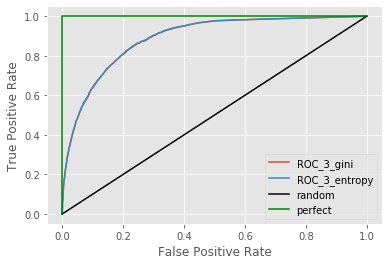

In [48]:
plt.plot(fpr_3_gini, tpr_3_gini,label = 'ROC_3_gini')
plt.plot(fpr_3_entropy, tpr_3_entropy,label = 'ROC_3_entropy')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [49]:
# The Area Under the Curve
auc_3_gini = roc_auc_score(y_test,y_pred_3_gini)
auc_3_entropy = roc_auc_score(y_test,y_pred_3_entropy)
print(("auc for tree3 by using gini:\n{}").format(auc_3_gini))
print(("auc for tree3 by using entropy:\n{}").format(auc_3_entropy))

auc for tree3 by using gini:
0.744703472095458
auc for tree3 by using entropy:
0.7470341877607553


### Fourth Tuning

In [50]:
tree_4_gini = DecisionTreeClassifier(criterion='gini',max_depth=8,
                              random_state=101,min_samples_leaf=8,min_samples_split=3)
tree_4_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=8,
                              random_state=101,min_samples_leaf=8,min_samples_split=3)

In [51]:
tree_4_gini.fit(X_train,y_train)
tree_4_entropy.fit(X_train,y_train)
y_pred_4_gini = tree_4_gini.predict(X_test)
y_pred_4_entropy = tree_4_entropy.predict(X_test)

In [52]:
# Confusion Matrix
confma_g = confusion_matrix(y_test, y_pred_4_gini)
confma_e = confusion_matrix(y_test, y_pred_4_entropy)
print(("Confusion Matrix for tree 4 by gini:\n{}").format(confma_g))
print(("Confusion Matrix for tree 4 by entropy:\n{}").format(confma_e))

Confusion Matrix for tree 4 by gini:
[[11588   847]
 [ 1724  2122]]
Confusion Matrix for tree 4 by entropy:
[[11564   871]
 [ 1707  2139]]


In [53]:
# Classification report
print(("Classification report for tree 4 by gini:\n{}").format(classification_report(y_test,y_pred_4_gini)))
print(("Classification report for tree 4 by entropy:\n{}").format(classification_report(y_test,y_pred_4_entropy)))

Classification report for tree 4 by gini:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.55      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281

Classification report for tree 4 by entropy:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.56      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281



In [54]:
# ROC
y_score_4_gini = tree_4_gini.predict_proba(X_test)[:,1]
fpr_4_gini, tpr_4_gini, thresholds_4_gini = roc_curve(y_test,y_score_4_gini)

y_score_4_entropy = tree_4_entropy.predict_proba(X_test)[:,1]
fpr_4_entropy, tpr_4_entropy, thresholds_4_entropy = roc_curve(y_test,y_score_4_entropy)


Text(0, 0.5, 'True Positive Rate')

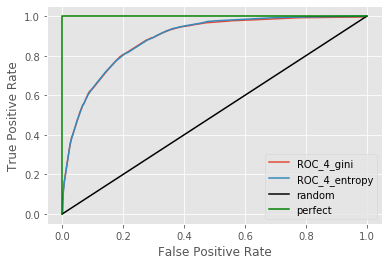

In [55]:
plt.plot(fpr_4_gini, tpr_4_gini,label = 'ROC_4_gini')
plt.plot(fpr_4_entropy, tpr_4_entropy,label = 'ROC_4_entropy')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [56]:
# The Area Under the Curve
auc_4_gini = roc_auc_score(y_test,y_pred_4_gini)
auc_4_entropy = roc_auc_score(y_test,y_pred_4_entropy)
print(("auc for tree4 by using gini:\n{}").format(auc_4_gini))
print(("auc for tree4 by using entropy:\n{}").format(auc_4_entropy))

auc for tree4 by using gini:
0.7418139379374933
auc for tree4 by using entropy:
0.7430590082469403


## Conclusion - Best Tree

### The manual best tree is the second tree by using Gini index

In [57]:
%%time
tree_2_gini = DecisionTreeClassifier(criterion='gini',max_depth=7,
                              random_state=101,min_samples_leaf=10,min_samples_split=4)

tree_2_gini.fit(X_train,y_train)
y_pred_2_gini = tree_2_gini.predict(X_test)


Wall time: 55.9 ms


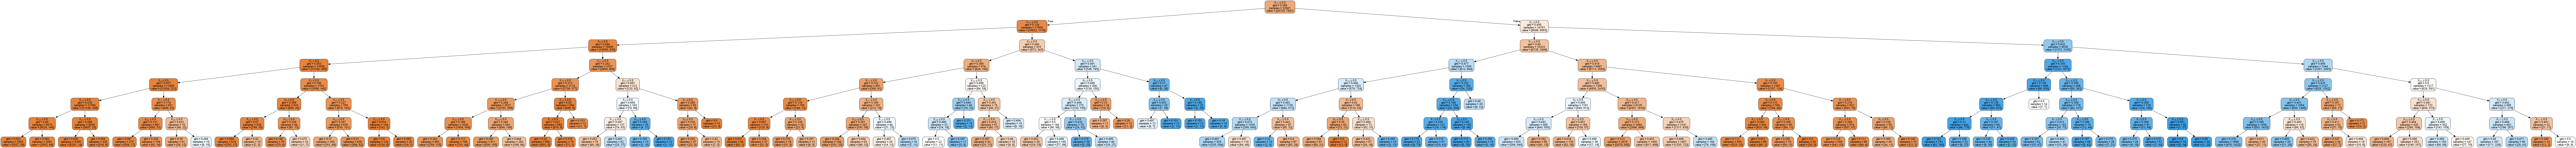

In [58]:
dot_data = StringIO()
export_graphviz(tree_2_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('best_tree.png')
Image(graph.create_png())

### Random Search

#### This part is just for practice

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
tree = DecisionTreeClassifier()

In [61]:
# set up a parameter dictionary
param_dist = {"max_depth": np.arange(1,20),
              "min_samples_leaf": np.arange(1,20),
              "min_samples_split": np.arange(2,15),
              "criterion": ["gini", "entropy"]}
# Instantiate the RandomSearch
tree_rs = RandomizedSearchCV(tree, param_dist, n_iter=50, cv=5, random_state=101)

In [62]:
tree_rs.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [63]:
# View the best parameter by using random search
print("Tuned Decision Tree Parameters: {}".format(tree_rs.best_params_))
# View best score
print("Best score is {}".format(tree_rs.best_score_))

Tuned Decision Tree Parameters: {'min_samples_split': 3, 'min_samples_leaf': 11, 'max_depth': 9, 'criterion': 'gini'}
Best score is 0.8425416909800068


In [84]:
tree_best = DecisionTreeClassifier(criterion='gini',min_samples_split=3, 
                                   min_samples_leaf=11, max_depth=9)
tree_best.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [85]:
y_pred_best = tree_best.predict(X_test)

In [86]:
# Confusion Matrix
confma = confusion_matrix(y_test, y_pred_best)
print(("Confusion Matrix:\n{}").format(confma))
print(classification_report(y_test,y_pred_best))

Confusion Matrix:
[[11532   903]
 [ 1634  2212]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12435
           1       0.71      0.58      0.64      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.84      0.84      0.84     16281



In [87]:
# ROC
y_score_best = tree_best.predict_proba(X_test)[:,1]
fpr_best, tpr_best, thresholds_best = roc_curve(y_test,y_score_best)


Text(0, 0.5, 'True Positive Rate')

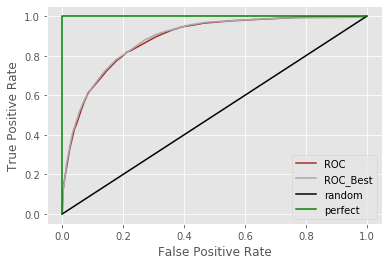

In [88]:
# Compare to my manual best tree, the result after random searching does seem slightly better.
plt.plot(fpr_2_gini, tpr_2_gini,'brown',label = 'ROC')
plt.plot(fpr_best, tpr_best,'darkgrey',label = 'ROC_Best')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [89]:
# The Area Under the Curve
auc_best = roc_auc_score(y_test,y_pred_best)
print(("auc for the best tree :\n{}").format(auc_best))

auc for the best tree :
0.7512626970700059


## Automation of Performance Tuning

You could decide what parameter you want to put in this function and will automatically print out the classification report.

In [70]:
def auto_tree(criterion, max_depth, min_samples_leaf, min_samples_split):
  tree = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth,
                                random_state=101,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)
  tree.fit(X_train,y_train)
  y_pred = tree.predict(X_test)
  return print(("Classification report by using {}, max_depth:{}, min_samples_leaf:{}, min_samples_split:{} is \n{}").
               format(criterion,max_depth, min_samples_leaf, min_samples_split,classification_report(y_test,y_pred)))

In [71]:
auto_tree('gini',12,4,2)

Classification report by using gini, max_depth:12, min_samples_leaf:4, min_samples_split:2 is 
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12435
           1       0.70      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.76     16281
weighted avg       0.83      0.84      0.83     16281



Automatically generate of the above “Hyperparameter Vs. Model Performance Table”

In [72]:
def class_reports():
  #set up the hyper-parameters
  criterion = ['entropy','gini']
  min_sample_split = [2,4,5,3]
  min_sample_leaf = [15,10,12,8]
  max_depth = [10,7,15,8]
  report_data = []
  # loop through both criterion
  for c in criterion:
    # loop through all hyper-parameters
    for mss, msl, md in zip(min_sample_split,min_sample_leaf,max_depth):
      tree = DecisionTreeClassifier(criterion = c, min_samples_split=mss, min_samples_leaf=msl, max_depth=md)
      tree.fit(X_train,y_train)
      y_pred = tree.predict(X_test)
      # set the output of classification report as dictionary
      report = classification_report(y_test,y_pred,output_dict=True)
      row = {}
      # setting up the keys and values for "row" dictionary
      row['criterion']=c     
      row['min_sample_split']=mss
      row['min_sample_leaf']=msl
      row['max_depth']=md
      # except for accuracy, the other scores are all under the key "1"
      row['recall'] = report['1'].get('recall')
      row['precision'] = report['1'].get('precision')
      row['f1-score'] = report['1'].get('f1-score')
      row['accuracy'] = report.get('accuracy')
      report_data.append(row)
  # make the report to dataframe and set criterion as index
  report_df = pd.DataFrame(report_data).set_index(['criterion'])
  return report_df

In [73]:
class_reports()

accuracy  f1-score  max_depth  min_sample_leaf  min_sample_split  \
criterion                                                                     
entropy    0.843806  0.632992         10               15                 2   
entropy    0.841840  0.630824          7               10                 4   
entropy    0.842393  0.629084         15               12                 5   
entropy    0.841656  0.623979          8                8                 3   
gini       0.843191  0.631761         10               15                 2   
gini       0.842516  0.638058          7               10                 4   
gini       0.841287  0.625724         15               12                 5   
gini       0.842086  0.622744          8                8                 3   

           precision    recall  
criterion                       
entropy     0.711320  0.570203  
entropy     0.703100  0.572023  
entropy     0.708333  0.565783  
entropy     0.710631  0.556162  
gini        0.709427  0.569423  
gini        0.697962  0.587624  
gini        0.706344  0.561622  
gini        0.714719  0.551742

## Prediction using your “trained” Decision Tree Model

• Hours Worked per Week = 48 \\
• Occupation Category = Mid - Low \\
• Marriage Status & Relationships = High \\
• Capital Gain = Yes \\
• Race-Sex Group = Mid \\
• Number of Years of Education = 12 \\
• Education Category = High \\
• Work Class = Income \\
• Age = 58

In [74]:
# Make the new obs to a 2D np.array so that we could fit in our previous data
new_row = np.array(['d. 41-50 & 61-70', 'b. Mid - Low', 'c. High', 'c. > 0', 'b. Mid', 'e. High','b. income','d. 36-40 & 56-60']).reshape(1,-1)

In [75]:
# This is the advantage of using onehotencoder. I could easily transform the new data to my previous fitted onehotencoder
# instead of appending the new data to dataframe and get dummies again.
x_new_person = onehotencoder.transform(new_row).toarray()

In [76]:
# My best tree is the second tree by using Gini index and since I've done random search, so I will put that result as well.
y_new_pred_tree2 = tree_2_gini.predict(x_new_person)
y_new_pred_best = tree_best.predict(x_new_person)
print(('The prediction for the new record by tree 2 is {}').format(y_new_pred_tree2))
print(('The prediction for the new record by best tree is {}').format(y_new_pred_best))

The prediction for the new record by tree 2 is [1]
The prediction for the new record by best tree is [1]


In [90]:
y_new_score_tree2 = tree_2_gini.predict_proba(x_new_person)[:,1]
y_new_score_best = tree_best.predict_proba(x_new_person)[:,1]
print(('The probability for the new record of being 1 by using tree 2 is {}').format(y_new_score_tree2))
# the best tree from random search seems better
print(('The probability for the new record of being 1 by using best tree is {}').format(y_new_score_best))

The probability for the new record of being 1 by using tree 2 is [0.6393972]
The probability for the new record of being 1 by using best tree is [0.69956459]
